In [2]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 841 kB/s 


In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# File system manangement
import os

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages
from scipy.stats import loguniform
from collections import defaultdict
from dtreeviz.trees import dtreeviz

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, PredefinedSplit

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve, make_scorer, silhouette_score

Part 2 of the project. To be submitted by 24/11 23h59

<p><img alt="Datasets" src="https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png" align="left" hspace="10px" vspace="0px"></p>

<h1>Datasets</h1>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
### 1- Load the dataset "dataset"
### This dataset should be the app_train from the question 6.a of part 1 (Refer to correction if need be). You can include the previous notebook here, but we recommend instead you export it from previous notebook then load it here.
my_dataset = pd.read_csv("/content/drive/MyDrive/DS/app_train_6a.csv.gz", compression='gzip')


In [79]:
# size and features of the dataset
def data_info(df):
    categorical_cols = df.select_dtypes(exclude='number').shape[1]
    numerical_cols = df.select_dtypes(include='number').shape[1]
    print(f"Number of samples: {df.shape[0]}")
    print(f"Number of features: {df.shape[1]}")
    print(f"Number of categorical features: {categorical_cols}")
    print(f"Number of numerical features: {numerical_cols}")
    print(f"Number of NAN values: {df.isnull().sum()}")
data_info(my_dataset)



Number of samples: 49650
Number of features: 123
Number of categorical features: 16
Number of numerical features: 107
Number of NAN values: Unnamed: 0                       0
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7527
AMT_REQ_CREDIT_BUREAU_WEEK    7527
AMT_REQ_CREDIT_BUREAU_MON     7527
AMT_REQ_CREDIT_BUREAU_QRT     7527
AMT_REQ_CREDIT_BUREAU_YEAR    7527
Length: 123, dtype: int64


In [80]:
# Fix missing data of the dataset
train_data = my_dataset.copy()
print(train_data.isnull().sum())

def FILLNAN(dataset):
  cnm_dataset = list(dict(dataset.isnull().sum()[dataset.isnull().sum() > 0 ]).keys())
  dataset_process = dataset.copy()
  for i in cnm_dataset:
    if dataset_process[i].dtypes in [int, float, complex]:
      # for the numerical data type, fill the missing data with the mean value of the column 
      dataset_process[i].fillna(np.nanmean(dataset_process[i]), inplace = True) 
    else:
      #for the object/bull/object data type, fill the missing data the most frequent value in the colunm
      dataset_process[i].fillna(dataset_process[i].mode()[0], inplace = True) 
  return dataset_process

train_data = FILLNAN(train_data)


Unnamed: 0                       0
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     7527
AMT_REQ_CREDIT_BUREAU_WEEK    7527
AMT_REQ_CREDIT_BUREAU_MON     7527
AMT_REQ_CREDIT_BUREAU_QRT     7527
AMT_REQ_CREDIT_BUREAU_YEAR    7527
Length: 123, dtype: int64


In [81]:
data_info(train_data)

Number of samples: 49650
Number of features: 123
Number of categorical features: 16
Number of numerical features: 107
Number of NAN values: Unnamed: 0                    0
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 123, dtype: int64


#A/ Processing the provided dataset  (review from past assignment, 7 pts)

1- Process the categorical features to be correctly handled. Use the most appropriate methods from sklearn (2 pts)

**1- Process the categorical features to be correctly handled. Use the most appropriate methods from sklearn (2 pts)**

In [82]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

# For the non-numeric categorical features, we can calssify them to two classes: 
# 1. Categories are not comparable; usually we can use OneHotEncoder
# 2. Categories are comparable; usually we use LabelEncoder


# We use label encoder for the  categories which have more than 6 values otherwise we use onehot encoder

# label encoder 

from sklearn import preprocessing

def Label_Encoder(df, col):
  le = preprocessing.LabelEncoder()
  le.fit(df[col])
  df[col] = le.transform(df[col])
  #print(df[col].value_counts())

train_data.reset_index(drop = True , inplace = True)
for col in train_data.select_dtypes(exclude="number").columns:
    val = len(train_data[col].value_counts())
    if val> 6:
      Label_Encoder(train_data,col)
      print(f'encoding {val} values in {col}')

# OneHot Encoder
  
train_data = pd.get_dummies(train_data, dummy_na=True)

encoding 7 values in NAME_TYPE_SUITE
encoding 7 values in NAME_INCOME_TYPE
encoding 18 values in OCCUPATION_TYPE
encoding 7 values in WEEKDAY_APPR_PROCESS_START
encoding 58 values in ORGANIZATION_TYPE
encoding 7 values in WALLSMATERIAL_MODE


In [83]:
data_info(train_data)

Number of samples: 49650
Number of features: 157
Number of categorical features: 0
Number of numerical features: 157
Number of NAN values: Unnamed: 0                       0
SK_ID_CURR                       0
TARGET                           0
CNT_CHILDREN                     0
AMT_INCOME_TOTAL                 0
                                ..
HOUSETYPE_MODE_terraced house    0
HOUSETYPE_MODE_nan               0
EMERGENCYSTATE_MODE_No           0
EMERGENCYSTATE_MODE_Yes          0
EMERGENCYSTATE_MODE_nan          0
Length: 157, dtype: int64


2- Process the anomalies of the dataset (1 pts)


In [85]:
# Drop rows where 'LANDAREA_AVG' == 0, and reset
train_data.drop(train_data[train_data['LANDAREA_AVG']==0].index, inplace=True)
train_data = train_data.reset_index()
train_data = train_data.drop(columns='index')

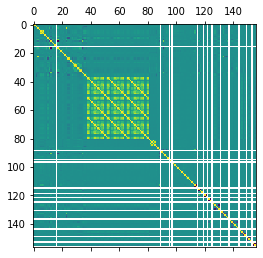

In [86]:
# correlation between features in train_data
correlations = train_data.corr()

import matplotlib.pyplot as plt
plt.matshow(correlations)
plt.show()


In [87]:
# Disassemble the train data into dependent and independent variables
Y = train_data['TARGET']   
X = train_data.drop("TARGET",1).drop("SK_ID_CURR",1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
# find the highly correlated features
def get_correlated(df, correlation_threshold = 0.95):
    correlations = df.corr(method='pearson')
    corrs = correlations.where(np.triu(np.ones(correlations.shape)).astype(np.bool))
    
    corrs = corrs.stack().reset_index()
    corrs.columns = ['Row','Column','Value']
    return corrs[(corrs["Value"]>correlation_threshold) & (corrs["Value"]<1)].sort_values(by="Value",ascending=False)

# Remove heavily correlated features
high_corr = get_correlated(X)
while(len(high_corr)>0):
    column_to_drop = high_corr["Row"].values[0]
    print("dropping feature",column_to_drop)
    X = X.drop(column_to_drop, axis=1)
    high_corr = get_correlated(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


dropping feature COMMONAREA_AVG
dropping feature YEARS_BUILD_AVG
dropping feature OBS_30_CNT_SOCIAL_CIRCLE
dropping feature FLOORSMIN_AVG
dropping feature BASEMENTAREA_AVG
dropping feature LIVINGAPARTMENTS_AVG
dropping feature ENTRANCES_AVG
dropping feature FLOORSMAX_AVG
dropping feature LIVINGAREA_AVG
dropping feature NONLIVINGAPARTMENTS_MODE
dropping feature APARTMENTS_AVG
dropping feature ELEVATORS_AVG
dropping feature NONLIVINGAREA_AVG
dropping feature YEARS_BEGINEXPLUATATION_AVG
dropping feature YEARS_BUILD_MODE
dropping feature LANDAREA_AVG
dropping feature FLOORSMIN_MODE
dropping feature FLOORSMAX_MODE
dropping feature ELEVATORS_MODE
dropping feature LANDAREA_MODE
dropping feature AMT_CREDIT
dropping feature COMMONAREA_MODE
dropping feature ENTRANCES_MODE
dropping feature NONLIVINGAPARTMENTS_AVG
dropping feature BASEMENTAREA_MODE
dropping feature APARTMENTS_MODE
dropping feature LIVINGAREA_MODE
dropping feature LIVINGAPARTMENTS_MODE
dropping feature NONLIVINGAREA_MODE
dropping f

In [89]:
# Disassemble the data -> 80% for training and 20% for validation
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, test_size=0.10, random_state=42)

3- Expand the 5 most important features (justify what 'important' means for you) using PolynomialFeatures (2 pts). You may need to process missing values before.

In [90]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_scaled, Y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

In [94]:
importances.sort_values(by = "Importance", ascending=False).head(5)

,Attribute,Importance
14,FLAG_EMP_PHONE,3.990546
9,DAYS_EMPLOYED,3.938106
22,REGION_RATING_CLIENT_W_CITY,0.166947
56,FLAG_DOCUMENT_3,0.130009
3,AMT_ANNUITY,0.102001


In [100]:
#the five most important features
most_important = importances.sort_values(by = "Importance", ascending=False).iloc[0:5].Attribute
print(most_important )

14                 FLAG_EMP_PHONE
9                   DAYS_EMPLOYED
22    REGION_RATING_CLIENT_W_CITY
56                FLAG_DOCUMENT_3
3                     AMT_ANNUITY
Name: Attribute, dtype: object


In [101]:
# Expand the most important features

transformer_pf = make_column_transformer(
    (PolynomialFeatures(interaction_only=True), most_important),
    remainder='passthrough',
    verbose_feature_names_out=False)

transformer_pf.fit(train_X)
transformed_pf_train = transformer_pf.transform(train_X)
transformed_pf_val = transformer_pf.transform(val_X)

train_X = pd.DataFrame(transformed_pf_train, columns=transformer_pf.get_feature_names_out())
val_X = pd.DataFrame(transformed_pf_val, columns=transformer_pf.get_feature_names_out())

# drop the column 1 created, it contains no important information
train_X.drop(columns="1", inplace=True)
val_X.drop(columns="1", inplace=True)


4- Process the features using the best Scaler (2 pts)

In [103]:
# use the StandardSclaer --> Logistic Regression converges with fewer iterations

cols_X = train_X.columns
# Declare scaler

scaler = StandardScaler()
scaler.fit(train_X)

robust_train = scaler.transform(train_X)
robust_val = scaler.transform(val_X)

train_X_scaled = pd.DataFrame(robust_train, columns=cols_X)
val_X_scaled = pd.DataFrame(robust_val, columns=cols_X)

#B/ Basic Machine Learning (8 pts)

In the following, you will use a split of my_dataset between train and validation. The metrics will be evaluated on the validation set.

5-Following the lecture and Random Forest example compare the performance of a Random Forest Classifier and a Logistic Regression Classifier:

5.1-Scale the features (only for Logistic Regression) (1 pts)

**Answer: **as result of question A(4)



5.2-Train a Logistic Regression with C = 0.0001  (1 pts)

In [104]:
logReg = LogisticRegression(C=0.0001, max_iter=100, random_state=42)
logReg.fit(train_X_scaled, np.ravel(train_Y))

LogisticRegression(C=0.0001, random_state=42)

5.3-Evaluate the performance metrics of the Logistic Regression. Which ones are relevant and which are not? (2 pts)

Accuracy score is: 0.6778481012658227
AUC is: 0.6779039850013963
Confusion matrix, without normalization
[[1624  784]
 [ 743 1589]]
Normalized confusion matrix
[[0.6744186  0.3255814 ]
 [0.31861063 0.68138937]]


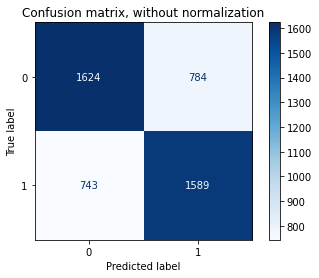

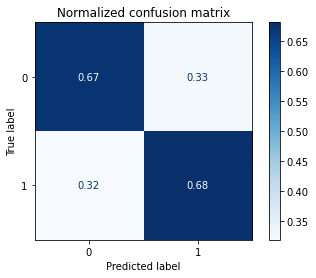

In [106]:
# predict
results_logReg = logReg.predict(val_X_scaled)
acc_score = accuracy_score(val_Y, results_logReg)
fpr, tpr, thresholds = roc_curve(val_Y, results_logReg)
auc_metrics = auc(fpr, tpr)
print("Accuracy score is:", acc_score)
print("AUC is:", auc_metrics)

confusion_matrix(val_Y, results_logReg)

#Plot non-normalized confusion matrix
titles = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles:
    disp = ConfusionMatrixDisplay.from_estimator(
        logReg,
        val_X_scaled,
        val_Y,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

5.4-Train a Random Forest Classifier with 100 estimators and the default max_depth (2 pts)

In [107]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(train_X, np.ravel(train_Y))

RandomForestClassifier(random_state=42)

5.5-Evaluate the performance metrics of the Random Forest. Which ones are relevant and which are not? (2 pts)

Accuracy score for RandomForestClassifier is: 0.6776371308016877
AUC is: 0.6775407019483368
Confusion matrix, without normalization
[[1646  762]
 [ 766 1566]]
Normalized confusion matrix
[[0.68355482 0.31644518]
 [0.32847341 0.67152659]]


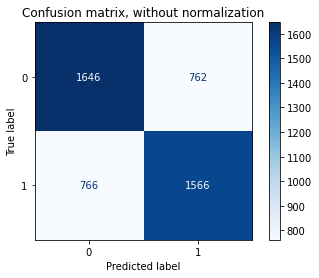

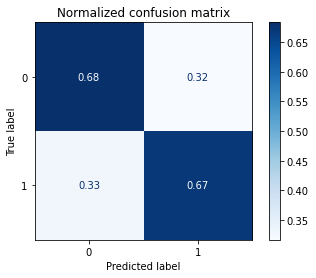

In [108]:
# predict
results_RF = RF.predict(val_X)
acc_score_rf = accuracy_score(val_Y, results_RF)
print("Accuracy score for RandomForestClassifier is:", acc_score_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(val_Y, results_RF)
auc_metrics_rf = auc(fpr_rf, tpr_rf)
print("AUC is:", auc_metrics_rf)

confusion_matrix(val_Y, results_RF)

#Plot non-normalized confusion matrix
titles = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles:
    disp = ConfusionMatrixDisplay.from_estimator(
        RF,
        val_X,
        val_Y,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

#C/ Machine Learning Hyper-parameter optimization (10 pts)

6-Use a grid-search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model (you can do a search manually with a loop or use Scikit-learn grid search features) (2 pts)

In [109]:
# define search space
space = dict()
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
space['class_weight'] = ["balanced", {0:0.5,1:0.5}, {0:0.6,1:0.4}]

# define model
model = LogisticRegression(max_iter=10000, random_state=42)

# define scoring
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# For cross validation, I will use the predefined validation set for testing models developed with the different hyperparameter combinations
split_index_scaled = [-1]*len(train_X_scaled) + [0]*len(val_X_scaled)
X_combined_scaled = np.concatenate((train_X_scaled, val_X_scaled), axis=0)
y_combined_scaled = np.concatenate((train_Y, val_Y), axis=0)

# define predefined split
pds = PredefinedSplit(test_fold = split_index_scaled)


# define search
search = GridSearchCV(model, param_grid=space, scoring=scoring, refit="AUC", cv=pds)
# fit with all the data
result = search.fit(X_combined_scaled, np.ravel(y_combined_scaled))

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7493156388368104
Best Hyperparameters: {'C': 0.001, 'class_weight': 'balanced'}



7.1-Use a random search to find a better combination C value and "class_weight" value for the previous Logistic Regression Model.  (you can do a search manually with a loop or use Scikit-learn grid search features) (2 pts)


In [110]:
# define search space for random search
spaceRS = dict()
spaceRS['C'] = loguniform(1e-5, 100)
spaceRS['class_weight'] = ["balanced", {0:0.5,1:0.5}, {0:0.6,1:0.4}]

# define model
model = LogisticRegression(max_iter=10000, random_state=42)

number_random_iterations = 0
current_grid_search = 0
prev_grid_search = result.best_score_

while round(current_grid_search,3) < round(prev_grid_search,3): # rounding up to 3 so that the code doesn't run for too long
    number_random_iterations += 1
    
    # define search
    searchRS = RandomizedSearchCV(model, spaceRS, scoring=scoring, refit="AUC", random_state=42, n_iter=number_random_iterations, cv=pds)

    # execute search
    resultRS = searchRS.fit(X_combined_scaled, np.ravel(y_combined_scaled))
    current_grid_search = resultRS.best_score_


7.2-How many random iterations are needed to find performances as good as your previous grid search? (2 pts)

In [111]:
print('Best Score: %s' % resultRS.best_score_)
print('Best Hyperparameters: %s' % resultRS.best_params_)
print("It took {} random iterations to find performances as good as the previous grid search.".format(number_random_iterations))

Best Score: 0.7490410395878803
Best Hyperparameters: {'C': 0.004185822729546973, 'class_weight': 'balanced'}
It took 1 random iterations to find performances as good as the previous grid search.


8.1-Plot how the performance metric selected in 5.5 changes when changing the number of estimators? When changing the depth of the trees (max 10)? (2 pts)

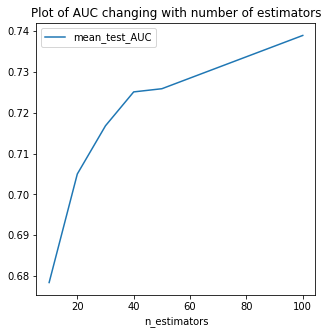

In [112]:
# define search space for grid search
space = dict()
space['n_estimators'] = [10, 20, 30, 40, 50, 100]

# define model
RF = RandomForestClassifier(random_state=42)

# define scoring
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# For cross validation, I will use the predefined validation set for testing models developed with the different hyperparameter combinations
split_index = [-1]*len(train_X) + [0]*len(val_X)
X_combined = np.concatenate((train_X, val_X), axis=0)
y_combined = np.concatenate((train_Y, val_Y), axis=0)

# define predefined split
pds = PredefinedSplit(test_fold = split_index)

# define search
search = GridSearchCV(RF, param_grid=space, scoring=scoring, refit="AUC", cv=pds)

# fit with all the data
result = search.fit(X_combined, np.ravel(y_combined))

# extract results and plot how auc changes with number of estimators
x = pd.DataFrame(result.cv_results_)
# select the two columns we need and change their names for better visualisations
x = x[['params', 'mean_test_AUC']] 
x['params'] = x['params'].map(lambda x: x['n_estimators'])
x.rename(columns={'params': 'n_estimators'}, inplace=True)
x.plot.line(x='n_estimators'
                    ,y='mean_test_AUC'
                    ,figsize=(5,5)
                    , title='Plot of AUC changing with number of estimators')

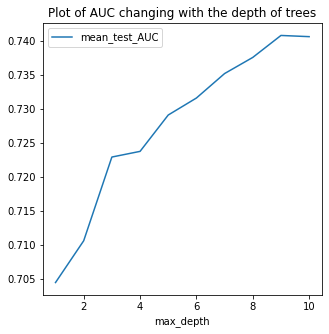

In [113]:
# plot how performance metric (accuracy) changes when changing the depth of trees
space = dict()
space['max_depth'] = [i for i in range(1, 11)]

# define model
RF = RandomForestClassifier(random_state=42)

# define scoring
scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# define search
search = GridSearchCV(RF, param_grid=space, scoring=scoring, refit="AUC", cv=pds)

# fit with all the data
result = search.fit(X_combined, np.ravel(y_combined))

# extract results and plot how auc changes with max_depth
x = pd.DataFrame(result.cv_results_)
# select the two columns we need and change their names for better visualisations
x = x[['params', 'mean_test_AUC']] 
x['params'] = x['params'].map(lambda x: x['max_depth'])
x.rename(columns={'params': 'max_depth'}, inplace=True)
x.plot.line(x='max_depth'
                    ,y='mean_test_AUC'
                    ,figsize=(5,5)
                    , title='Plot of AUC changing with the depth of trees')


8.2-What are the optimal values of these parameters (optimized together)? (2 pts)

In [115]:
# define search space
space = dict()
space['max_depth'] = [10, 20, 30, 40, 50, 100]
space['n_estimators'] = [i for i in range(1, 11)]

# define model
model = RandomForestClassifier(random_state=42)

# define search
search = GridSearchCV(model, space, scoring=scoring, refit='AUC', cv=pds)
# execute search
result = search.fit(X_combined, np.ravel(y_combined))

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.7177443826467521
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 10}


#D/ Post Machine Learning Feature inteprepretation (5 pts)

9.1-Get the features importance of the Optimal Random Forest classifier (obtained in 8) (2 pts)


In [116]:
# define model
max_depth = result.best_params_['max_depth']
n_estimators = result.best_params_['n_estimators']

# define optimal model
forest = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=42)

forest.fit(train_X, np.ravel(train_Y))
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=train_X.columns)

# Get the most important features ranked 
ranked_importances = forest_importances.sort_values(ascending=False).iloc[0:11].index
ranked_importances

Index(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 'DAYS_BIRTH',
       'DAYS_EMPLOYED REGION_RATING_CLIENT_W_CITY',
       'DAYS_EMPLOYED AMT_ANNUITY', 'DAYS_LAST_PHONE_CHANGE',
       'FLAG_EMP_PHONE DAYS_EMPLOYED', 'AMT_GOODS_PRICE',
       'FLAG_EMP_PHONE REGION_RATING_CLIENT_W_CITY', 'DAYS_EMPLOYED'],
      dtype='object')

9.2-Are they the features that are the most correlated with the target? (1 pts)

In [118]:
zz = train_Y.reset_index().drop(columns='index')
cc = pd.merge(zz, train_X, left_index=True, right_index=True)
# Get the correlation between TARGET and all other features
correlations = cc[cc.columns[:]].corr()['TARGET'][:]
correlations.sort_values(ascending=False).iloc[0:11]

# The result shows the most important features are also the most correlated with the target

TARGET                                         1.000000
DAYS_BIRTH                                     0.148428
FLAG_EMP_PHONE REGION_RATING_CLIENT_W_CITY     0.132907
DAYS_LAST_PHONE_CHANGE                         0.108276
REGION_RATING_CLIENT_W_CITY FLAG_DOCUMENT_3    0.106793
FLAG_EMP_PHONE FLAG_DOCUMENT_3                 0.105754
REGION_RATING_CLIENT_W_CITY                    0.105115
CODE_GENDER_M                                  0.101447
DAYS_ID_PUBLISH                                0.100615
REGION_RATING_CLIENT                           0.098786
FLAG_EMP_PHONE DAYS_EMPLOYED                   0.097087
Name: TARGET, dtype: float64


10-Compare the tree structure obtained with visualization (using export_graphviz for instance) of the first tree of your random forest and the last tree of your random forest. How can you explain the differences?  (2 pts)

In [120]:
viz = dtreeviz(forest.estimators_[0], train_X, np.ravel(train_Y), feature_names=train_X.columns, target_name="Target")
viz.save('first_tree.svg')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [123]:
# plot of the last tree of the random forest
viz = dtreeviz(forest.estimators_[8], train_X, np.ravel(train_Y), feature_names=train_X.columns, target_name="Target")
viz.save('last_tree.svg')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


#E/ Evasion attacks (12pts)

11- Implement the Algorithm 2 from the research paper in https://arxiv.org/pdf/1605.07277.pdf

Section 6.5 of the research paper describes the intuition of the algorithm and the different parameters (5pts).

PS: the whole paper gives you a good understand of adversarial attacks and is a recommended reading

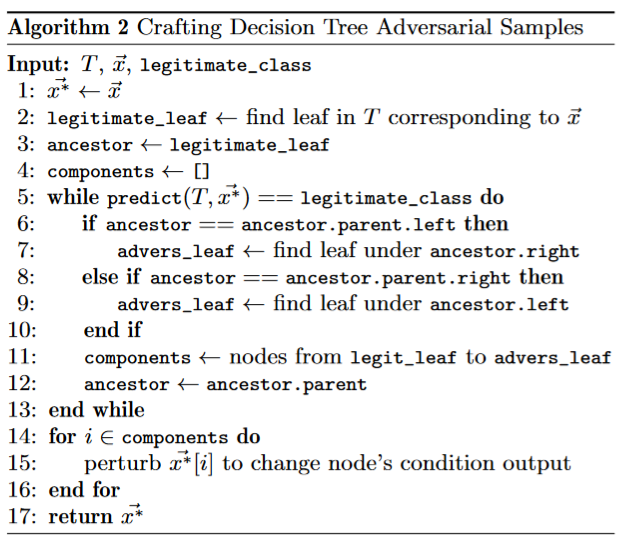

In [ ]:
def my_decision_tree_attack(model, x):
  x_adv = x
  ## generate the adversarials

  return x_adv

12.1- Either using the attack you implemented in question 11. or using the library Adversarial Robustness Toolbox (https://github.com/Trusted-AI/adversarial-robustness-toolbox/), generate a Decision Tree Attack on the validation set on the first tree of the random forest (cf question 10). (5pts).

In [124]:
!pip install adversarial-robustness-toolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 11.3 MB/s 


In [126]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits

from art.attacks.evasion import DecisionTreeAttack
from art.estimators.classification import SklearnClassifier


In [146]:
print(val_X)

      FLAG_EMP_PHONE  DAYS_EMPLOYED  REGION_RATING_CLIENT_W_CITY  \
0                1.0        -1187.0                          1.0   
1                1.0         -184.0                          3.0   
2                1.0         -478.0                          2.0   
3                0.0       365243.0                          2.0   
4                0.0       365243.0                          2.0   
...              ...            ...                          ...   
4735             0.0       365243.0                          2.0   
4736             1.0        -1523.0                          1.0   
4737             0.0       365243.0                          2.0   
4738             1.0        -1128.0                          2.0   
4739             1.0         -691.0                          2.0   

      FLAG_DOCUMENT_3  AMT_ANNUITY  FLAG_EMP_PHONE DAYS_EMPLOYED  \
0                 0.0      48586.5                       -1187.0   
1                 1.0      31207.5             

ScikitlearnDecisionTreeClassifier(model=DecisionTreeClassifier(), clip_values=None, preprocessing=StandardisationMeanStd(mean=0.0, std=1.0, apply_fit=True, apply_predict=True), preprocessing_defences=None, postprocessing_defences=None, preprocessing_operations=[StandardisationMeanStd(mean=0.0, std=1.0, apply_fit=True, apply_predict=True)], nb_classes=2, input_shape=(135,), use_logits=False)
[0 0 0 ... 0 1 0]
4740


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


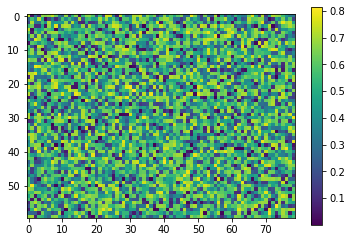

In [156]:
clf = DecisionTreeClassifier()
clf.fit(val_X,val_Y)
clf_art = SklearnClassifier(clf)
print(clf.predict(val_X))
print(len(val_X.EXT_SOURCE_2.values))
plt.imshow(val_X.EXT_SOURCE_2.values.reshape(60,79))
plt.colorbar()

In [158]:
clf = DecisionTreeClassifier()
clf.fit(val_X,val_Y)
clf_art = SklearnClassifier(clf)
attack = DecisionTreeAttack(clf_art)
adv = attack.generate(val_X.values())
print(clf.predict(adv))
print(adv)
#plt.imshow(adv[0].reshape(8,8))
# plt.imshow((X[0]-adv[0]).reshape(8,8))  ##use this to plot the difference

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_features_` is deprecated in 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


TypeError: ignored

In [154]:
attack = DecisionTreeAttack(clf_art,offset=20.0)
adv = attack.generate(val_X)
print(clf.predict(adv))
plt.imshow(val_X.EXT_SOURCE_2.values.reshape(60,79))
plt.colorbar()

Decision tree attack:   0%|          | 0/4740 [00:00<?, ?it/s]

KeyError: ignored

12.2-Evaluate the AUC on the generated adversarial examples. It should be lower than the AUC obtained on question 8.2. (2pts).

#F/ Semi-supervised Learning (8pts)

It is recommended to optimize the hyper parameters of each of the techniques 

13.1 Using LabelPropagation from sklearn library, fit the labels using the validation set and infer the labels of the training set (3pts)

In [122]:
from sklearn.semi_supervised import LabelPropagation

# define search space
space_LP = dict()
space_LP['kernel'] = ['knn'] # RBF leads to this error --> usr/local/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide probabilities /= normalizer
space_LP['gamma'] = [5, 10, 20, 30, 50]
space_LP['tol'] = [0.1, 0.01, 0.001]
space_LP['n_neighbors'] = [i for i in range(1, 11)]

# define model
label_prop_model = LabelPropagation()

# define search
search_LP = GridSearchCV(label_prop_model, space_LP, scoring='accuracy')
# execute search
result_LP = search_LP.fit(val_X_scaled, np.ravel(val_Y))

# summarize result
print('Best Score: %s' % result_LP.best_score_)
print('Best Hyperparameters: %s' % result_LP.best_params_)


# Infer labels of training set
y_pred_LP = search_LP.predict(train_X_scaled)

KeyboardInterrupt: ignored

13.1 Using LabelSpreading from sklearn library, fit the labels using the validation set and infer the labels of the training set (3pts)

In [ ]:
from sklearn.semi_supervised import LabelSpreading

# define search space
space_LS = dict()
space_LS['kernel'] = ['knn']
space_LS['gamma'] = [5, 10, 20, 30, 50]
space_LS['tol'] = [0.1, 0.01, 0.001]
space_LS['n_neighbors'] = [i for i in range(1, 11)]
space_LS['alpha'] = [0.1, 0.2, 0.3, 0.4, 0.5]

# define model
label_spread_model = LabelSpreading()

# define search
search_LS = GridSearchCV(label_spread_model, space_LS, scoring='accuracy')
# execute search
result_LS = search_LS.fit(val_X_scaled, np.ravel(val_Y))

# summarize result
print('Best Score: %s' % result_LS.best_score_)
print('Best Hyperparameters: %s' % result_LS.best_params_)


# Infer labels of training set
y_pred_LS = search_LS.predict(train_X_scaled)

14. Compare the silhouette performance metrics and the accuracy of the labels of the clusters obtained using each technique. (2pts)

In [ ]:
print("For the LabelPropagation model:")
accuracy_LP = accuracy_score(app_train_Y, y_pred_LP)
silhouette_score_LP = silhouette_score(app_train_X_scaled, y_pred_LP)
print("Accuracy score for the LabelPropagation model is:", accuracy_LP)
print("Silhouette score for the LabelPropagation model is:", silhouette_score_LP)

print("For the LabelSpreading model:")
accuracy_LS = accuracy_score(app_train_Y, y_pred_LS)
silhouette_score_LS = silhouette_score(app_train_X_scaled, y_pred_LS)
print("Accuracy score for the LabelSpreading model is:", accuracy_LS)
print("Silhouette score for the LabelSpreading model is:", silhouette_score_LS)

###Bonus question:

Using all the techniques seen in the course (and others if need be), build the best model you can and submit it (Late submission option) to the Kaggle challenge https://www.kaggle.com/competitions/home-credit-default-risk/leaderboard


You can work by teams up to 3 people, and you need to submit with the assignment the name of your team and your score in the leaderboard

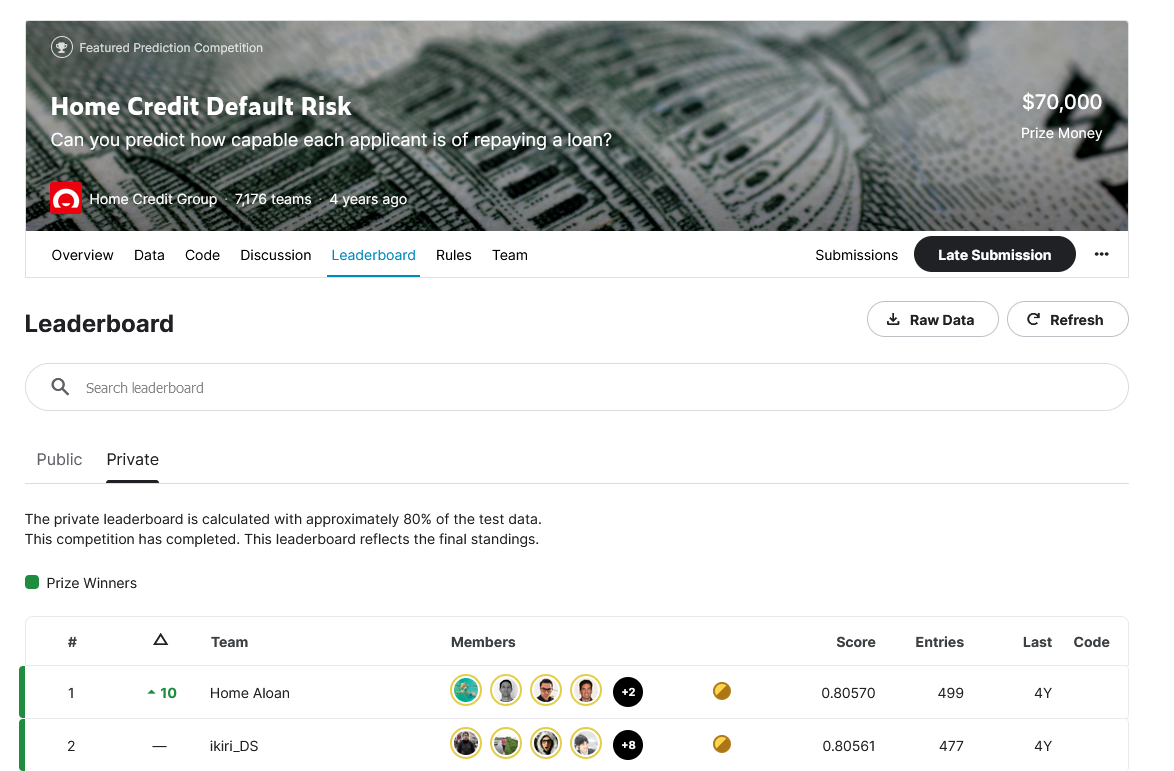

Each member of the best team will get +7 pts

Each member of the second best team will get +5 pts

Each member of the third best team will get +3 pts